<a href="https://colab.research.google.com/github/shivicode1108/Dog-vs-Cat-Classification/blob/main/dog_vs_cat_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
# installing the Kaggle library
!pip install kaggle

In [79]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

IMPORTING DATASET

In [80]:
# Kaggle api
!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [81]:
!ls

 dogs-vs-cats.zip   kaggle.json   sampleSubmission.csv	 train
'image resized'     sample_data   test1.zip		 train.zip


In [82]:
#extracting the compressed dataset
from zipfile import ZipFile
df='/content/dogs-vs-cats.zip'
with ZipFile(df,'r') as zip:
  zip.extractall()
  print('The data is extracted')

The data is extracted


In [83]:
#extracting the compressed dataset
from zipfile import ZipFile
df='/content/train.zip'
with ZipFile(df,'r') as zip:
  zip.extractall()
  print('The data is extracted')

The data is extracted


In [84]:
import os
#counting the number of files in trained dataset
path,dirs,files=next(os.walk('/content/train'))
file_count=len(files)
print("number of images:",file_count)

number of images: 25000


Printing the names of Images

In [85]:
file_names=os.listdir('/content/train/')
print(file_names)

['cat.10141.jpg', 'dog.12265.jpg', 'dog.10526.jpg', 'cat.6319.jpg', 'dog.5417.jpg', 'dog.6806.jpg', 'cat.7097.jpg', 'dog.654.jpg', 'cat.6352.jpg', 'cat.12303.jpg', 'cat.291.jpg', 'dog.11255.jpg', 'cat.11156.jpg', 'cat.3584.jpg', 'cat.387.jpg', 'cat.2817.jpg', 'cat.2163.jpg', 'cat.6706.jpg', 'dog.4988.jpg', 'cat.9946.jpg', 'dog.6481.jpg', 'cat.7340.jpg', 'dog.7930.jpg', 'dog.3866.jpg', 'cat.5277.jpg', 'cat.2518.jpg', 'dog.11935.jpg', 'dog.4905.jpg', 'dog.3110.jpg', 'dog.5023.jpg', 'cat.1881.jpg', 'cat.936.jpg', 'dog.2375.jpg', 'cat.10249.jpg', 'cat.10638.jpg', 'cat.1731.jpg', 'dog.12102.jpg', 'cat.7327.jpg', 'cat.12451.jpg', 'dog.3298.jpg', 'dog.7808.jpg', 'cat.11666.jpg', 'dog.525.jpg', 'dog.10348.jpg', 'dog.3538.jpg', 'cat.10950.jpg', 'dog.11369.jpg', 'cat.7503.jpg', 'cat.6161.jpg', 'cat.6475.jpg', 'cat.4945.jpg', 'cat.8398.jpg', 'cat.3591.jpg', 'dog.4285.jpg', 'dog.6529.jpg', 'dog.2852.jpg', 'cat.12014.jpg', 'dog.2569.jpg', 'dog.8814.jpg', 'dog.3737.jpg', 'dog.2863.jpg', 'dog.6176.jp

IMPORTING THE DEPENDENCIES

In [86]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

DISPLAYING THE IMAGES

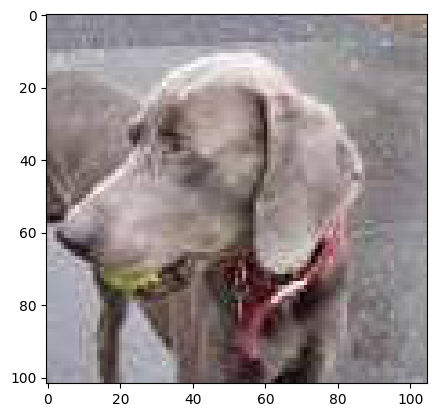

In [87]:
#DISPLAYING DOG IMAGES
img=mpimg.imread('/content/train/dog.12265.jpg')
imgplot=plt.imshow(img)
plt.show()

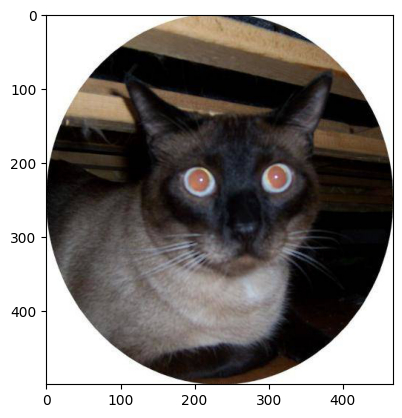

In [88]:
#DISPLAYING CAT IMAGES
img=mpimg.imread('/content/train/cat.10141.jpg')
imgplot=plt.imshow(img)
plt.show()

In [89]:
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


Resizing all the Images

In [92]:
#creating a directory for resized images
os.mkdir('/content/image resized')

FileExistsError: ignored

In [93]:
original_folder='/content/train/'
resized_folder='/content/image resized/'
for i in range(2000):
  filename=os.listdir(original_folder)[i]
  img_path=original_folder+filename

  img=Image.open(img_path)
  img=img.resize((224,224))
  img=img.convert('RGB')


  newImgPath=resized_folder+filename
  img.save(newImgPath)

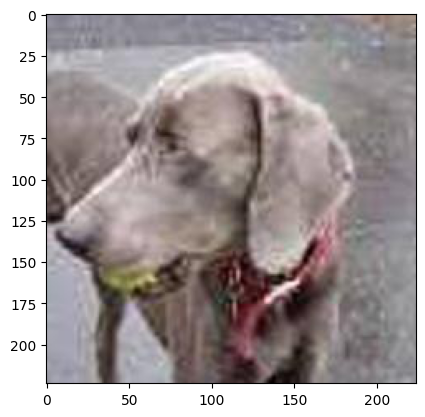

In [94]:
#DISPLAYING RESIZED DOG IMAGES
img=mpimg.imread('/content/image resized/dog.12265.jpg')
imgplot=plt.imshow(img)
plt.show()

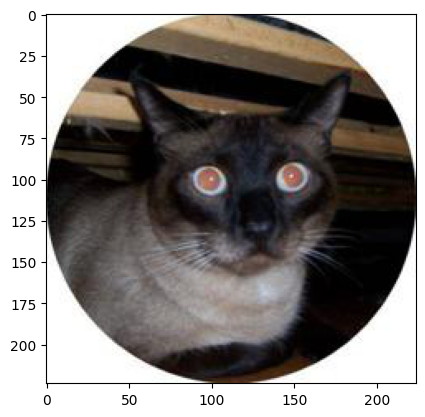

In [95]:
#DISPLAYING RESIZED CAT IMAGES
img=mpimg.imread('/content/image resized/cat.10141.jpg')
imgplot=plt.imshow(img)
plt.show()

CREATING LABELS FOR RESIZED IMAGES FOR DOGS AND CATS

cat---->0
Dog---->1

In [96]:
#creating a for loop to assign labels
filenames=os.listdir('/content/image resized/')
labels=[]
for i in range(2000):
  file_name=filenames[i]
  label=file_name[0:3]
  if label=='dog':
    labels.append(1)
  else:
    labels.append(0)

In [97]:
print(filenames[0:5])

['cat.10141.jpg', 'dog.12265.jpg', 'dog.10526.jpg', 'cat.6319.jpg', 'dog.5417.jpg']


In [98]:
print(len(filenames))

2000


In [99]:
print(labels[0:5])

[0, 1, 1, 0, 1]


In [100]:
print(len(labels))

2000


In [101]:
#counting the images of dogs and cats out of 200 images
values,counts=np.unique(labels,return_counts=True)

In [102]:
print(values)

[0 1]


In [103]:
print(counts)

[1020  980]


CONVERTING ALL THE RESIZED IMAGES TO NUMPY ARRAYS

In [104]:
import cv2

In [105]:
import glob

In [106]:
image_directory='/content/image resized/'
image_extension=['png','jpg']
files=[]
[files.extend(glob.glob(image_directory+'*.'+e))for e in image_extension]
dog_cat_images=np.asarray([cv2.imread(file)for file in files])

In [107]:
print(dog_cat_images)

[[[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  ...

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]]


 [[[151 137 139]
   [151 137 139]
   [152 138 140]
   ...
   [132 144 162]
   [130 142 160]
   [128 140 158]]

  [[151 137 139]
   [151 137 139]
   [151 137 139]
   ...
   [133 145 163]
   [132 144 162]
   [131 143 161]]

  [[152 138 140]
   [152 138 140]
   [151 137 139]
   ...
   [138 148 165]
   [138 148 165]
   [139 149

In [108]:
type(dog_cat_images)

numpy.ndarray

In [109]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [110]:
x=dog_cat_images
y=np.asarray(labels)

Train Test Split

In [111]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [112]:
print(x.shape)

(2000, 224, 224, 3)


In [113]:
print(x_train.shape)

(1800, 224, 224, 3)


In [114]:
print(x_test.shape)

(200, 224, 224, 3)


1800 ------->TRAINING IMAGES
200--------->TEST IMAGES

In [115]:
#scaling the data
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [116]:
print(x_train_scaled)

[[[[0.18823529 0.29803922 0.29803922]
   [0.15686275 0.26666667 0.26666667]
   [0.08235294 0.2        0.20392157]
   ...
   [0.45098039 0.63921569 0.56862745]
   [0.42352941 0.62352941 0.54509804]
   [0.45098039 0.65098039 0.57254902]]

  [[0.44705882 0.54901961 0.54901961]
   [0.36470588 0.4745098  0.4745098 ]
   [0.23137255 0.34117647 0.34509804]
   ...
   [0.49019608 0.67843137 0.60784314]
   [0.4        0.6        0.52156863]
   [0.46666667 0.66666667 0.58823529]]

  [[0.78431373 0.87843137 0.87058824]
   [0.74901961 0.85490196 0.84313725]
   [0.64313725 0.75294118 0.75294118]
   ...
   [0.5254902  0.71372549 0.64313725]
   [0.36470588 0.56470588 0.48627451]
   [0.44705882 0.64705882 0.56862745]]

  ...

  [[0.95686275 1.         1.        ]
   [0.81568627 0.8627451  0.87058824]
   [0.59215686 0.63921569 0.64705882]
   ...
   [0.7254902  0.95294118 0.88235294]
   [0.48627451 0.70196078 0.63529412]
   [0.43137255 0.64705882 0.58039216]]

  [[0.90588235 0.95294118 0.95294118]
   [0.7

In [117]:
print(x_test_scaled)

[[[[0.2        0.22745098 0.17647059]
   [0.42745098 0.45098039 0.40784314]
   [0.64705882 0.6627451  0.63921569]
   ...
   [0.03921569 0.09411765 0.08627451]
   [0.03921569 0.09411765 0.08627451]
   [0.03921569 0.09411765 0.08627451]]

  [[0.21960784 0.24705882 0.19607843]
   [0.38039216 0.40392157 0.36078431]
   [0.60392157 0.61960784 0.59607843]
   ...
   [0.01960784 0.0745098  0.06666667]
   [0.01960784 0.07058824 0.0627451 ]
   [0.01568627 0.07058824 0.0627451 ]]

  [[0.1254902  0.14901961 0.10588235]
   [0.23529412 0.25490196 0.21960784]
   [0.48627451 0.50196078 0.47843137]
   ...
   [0.01176471 0.0627451  0.05490196]
   [0.01568627 0.05882353 0.05098039]
   [0.01568627 0.06666667 0.05882353]]

  ...

  [[0.63529412 0.56470588 0.41960784]
   [0.69803922 0.62745098 0.48235294]
   [0.71372549 0.64313725 0.49803922]
   ...
   [0.78823529 0.75686275 0.70588235]
   [0.76862745 0.7372549  0.68627451]
   [0.74901961 0.71764706 0.66666667]]

  [[0.58823529 0.51372549 0.37647059]
   [0.6

BUILDING THE NEURAL NETWORK

In [118]:
import tensorflow as tf
import tensorflow_hub as hub

In [119]:
mobilenet_model='https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

In [120]:
pretrained_model=hub.KerasLayer(mobilenet_model,input_shape=(224,224,3),trainable=False)

In [121]:
num_OF_classes=2
model=tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_OF_classes)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [124]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)

In [125]:
model.fit(x_train_scaled,y_train,epochs=5)

Epoch 1/5
57/57 [==============================] - 91s 1s/step - loss: 0.2185 - acc: 0.9056
Epoch 2/5
57/57 [==============================] - 102s 2s/step - loss: 0.0753 - acc: 0.9761
Epoch 3/5
57/57 [==============================] - 114s 2s/step - loss: 0.0592 - acc: 0.9839
Epoch 4/5
57/57 [==============================] - 110s 2s/step - loss: 0.0481 - acc: 0.9878
Epoch 5/5
57/57 [==============================] - 88s 2s/step - loss: 0.0410 - acc: 0.9867


In [127]:
score,acc=model.evaluate(x_test_scaled,y_test)
print('Test Loss=',score)
print('Test Accuracy=',acc)

7/7 [==============================] - 10s 1s/step - loss: 0.0868 - acc: 0.9650
Test Loss= 0.08681996166706085
Test Accuracy= 0.9649999737739563


In [129]:
#PREDICTIVE SYSTEM

Path of the image to be predicted: /content/download.jpg


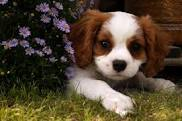

1/1 [==============================] - 2s 2s/step
[[-2.5133169  2.7868414]]
1
The image represents a Dog


In [131]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')